In [81]:
import pandas as pd
import numpy as np


# BUSINESS ANALYTICS

Bartley Dawud Okiya

## Analyze the Business Metrics


In [82]:
# Load the data
df = pd.read_excel('business_data.xlsx')

print(df.head())


        Date  Revenue  Expenses  Customers  New Customers  Churn Rate
0 2024-01-01    12270      5160        198             37    0.045507
1 2024-01-02     5860      7097        287             37    0.019608
2 2024-01-03    10390      7737        215             47    0.040209
3 2024-01-04    10191      9363        290             41    0.025271
4 2024-01-05    10734      8685        352             16    0.068216


### Calculated Fields (Profit, Margins, Acquisition Rate)

In [83]:
# Profit
df['Profit'] = df['Revenue'] - df['Expenses']

# Profit Margin
df['Profit Margin'] = df['Profit'] / df['Revenue']

# Acquisition Rate
df['Acquisition Rate'] = df['New Customers'] / df['Customers']

# Display
print(df.head())


        Date  Revenue  Expenses  Customers  New Customers  Churn Rate  Profit  \
0 2024-01-01    12270      5160        198             37    0.045507    7110   
1 2024-01-02     5860      7097        287             37    0.019608   -1237   
2 2024-01-03    10390      7737        215             47    0.040209    2653   
3 2024-01-04    10191      9363        290             41    0.025271     828   
4 2024-01-05    10734      8685        352             16    0.068216    2049   

   Profit Margin  Acquisition Rate  
0       0.579462          0.186869  
1      -0.211092          0.128920  
2       0.255342          0.218605  
3       0.081248          0.141379  
4       0.190889          0.045455  


### Monthly summary

In [84]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Monthly summary
monthly_summary = df.resample('M', on='Date').sum()

print(monthly_summary[['Revenue', 'Expenses', 'Profit']])


            Revenue  Expenses  Profit
Date                                 
2024-01-31   303869    209598   94271
2024-02-29   292377    180014  112363
2024-03-31   330454    218042  112412
2024-04-30   309732    200268  109464
2024-05-31   322524    212696  109828
2024-06-30   270720    172163   98557


C:\Users\HP\AppData\Local\Temp\ipykernel_17768\1526206159.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summary = df.resample('M', on='Date').sum()


### trend analysis

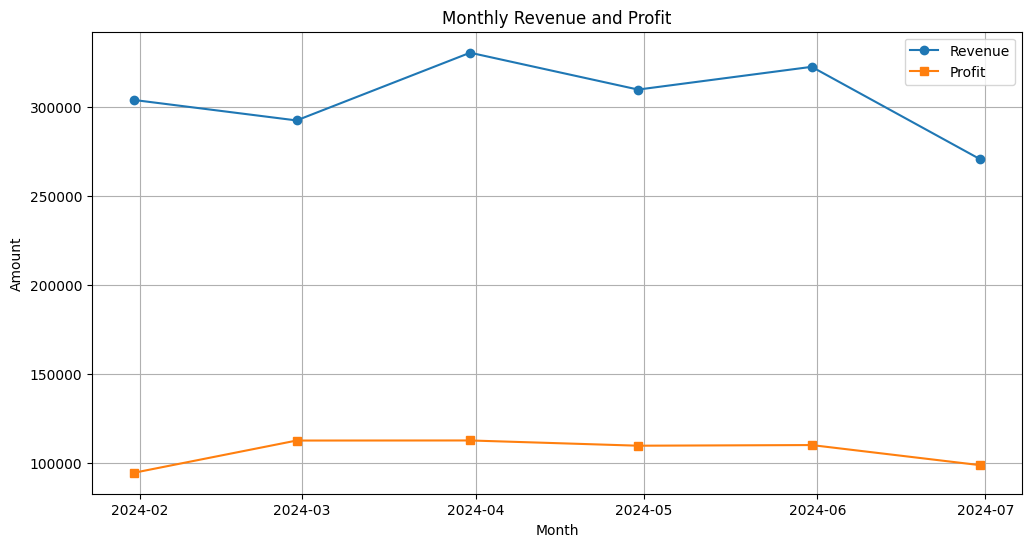

In [85]:
import matplotlib.pyplot as plt

# Revenue and Profit Trend
plt.figure(figsize=(12,6))
plt.plot(monthly_summary.index, monthly_summary['Revenue'], marker='o', label='Revenue')
plt.plot(monthly_summary.index, monthly_summary['Profit'], marker='s', label='Profit')
plt.title('Monthly Revenue and Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid()
plt.legend()
plt.show()


### compare monthly target to revenue

In [86]:
revenue_goal = 300000  # Monthly target
monthly_summary['Goal Achieved'] = monthly_summary['Revenue'] >= revenue_goal

print(monthly_summary[['Revenue', 'Goal Achieved']])


            Revenue  Goal Achieved
Date                              
2024-01-31   303869           True
2024-02-29   292377          False
2024-03-31   330454           True
2024-04-30   309732           True
2024-05-31   322524           True
2024-06-30   270720          False


## Churn Analysis 

### Daily Churn Overview

count    180.000000
mean       0.052986
std        0.024658
min        0.010234
25%        0.033204
50%        0.053219
75%        0.072788
max        0.098763
Name: Churn Rate, dtype: float64


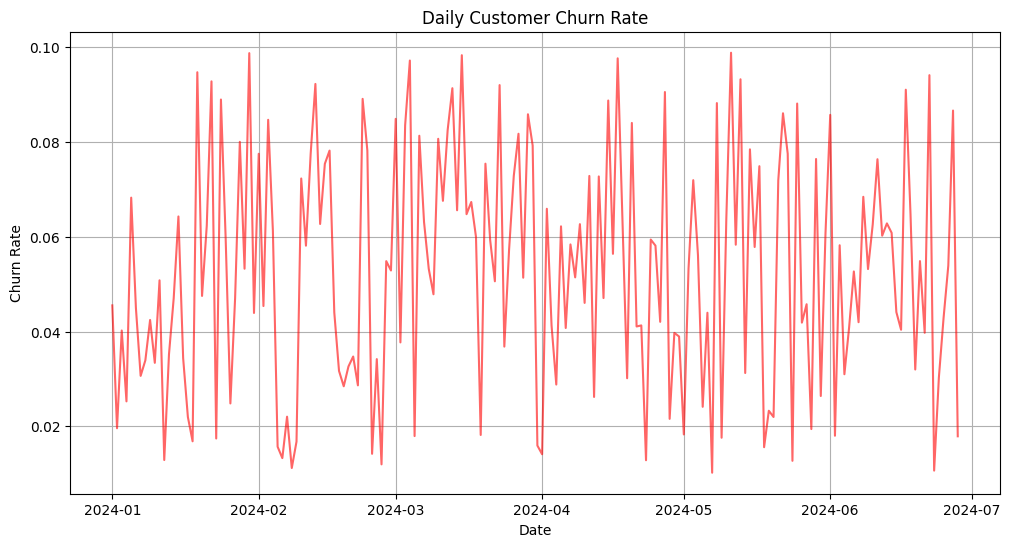

In [87]:
# descr stats
print(df['Churn Rate'].describe())

# Plot daily churn rates

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Churn Rate'], color='red', alpha=0.6)
plt.title('Daily Customer Churn Rate')
plt.xlabel('Date')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()


### Monthly Churn analysis

Date
2024-01-31    0.047689
2024-02-29    0.048254
2024-03-31    0.065168
2024-04-30    0.051884
2024-05-31    0.051854
2024-06-30    0.052697
Freq: ME, Name: Churn Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_17768\3509080772.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_churn = df.resample('M', on='Date')['Churn Rate'].mean()


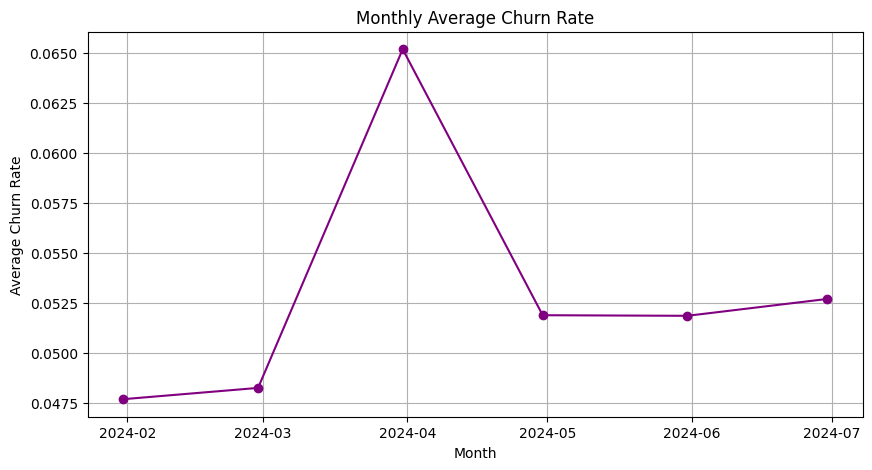

In [88]:
# Resample and average churn monthly
monthly_churn = df.resample('M', on='Date')['Churn Rate'].mean()

print(monthly_churn)

# Plot monthly average churn
plt.figure(figsize=(10,5))
plt.plot(monthly_churn.index, monthly_churn.values, marker='o', color='purple')
plt.title('Monthly Average Churn Rate')
plt.xlabel('Month')
plt.ylabel('Average Churn Rate')
plt.grid()
plt.show()


In [89]:
# Threshold for high churn (say >8%)
high_churn_months = monthly_churn[monthly_churn > 0.055]
print("Months with High Churn Rates:")
print(high_churn_months)


Months with High Churn Rates:
Date
2024-03-31    0.065168
Freq: ME, Name: Churn Rate, dtype: float64


business lost alot of customer in the month of march. Overal trend the business is losing customers

### Monthly Metrics

In [90]:
# Monthly sums/averages
monthly = df.resample('M', on='Date').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Churn Rate': 'mean'
})

print(monthly.head())


            Revenue  Profit  Churn Rate
Date                                   
2024-01-31   303869   94271    0.047689
2024-02-29   292377  112363    0.048254
2024-03-31   330454  112412    0.065168
2024-04-30   309732  109464    0.051884
2024-05-31   322524  109828    0.051854


C:\Users\HP\AppData\Local\Temp\ipykernel_17768\3168109546.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='Date').agg({


### Check Correlations

In [91]:
# Calculate Pearson correlation
correlation_matrix = monthly.corr()

print(correlation_matrix)


             Revenue    Profit  Churn Rate
Revenue     1.000000  0.521037    0.528385
Profit      0.521037  1.000000    0.423105
Churn Rate  0.528385  0.423105    1.000000


Moderate positive reletionship for Revenue vs Churn Rate and Profit vs Churn Rate

## Customer Growth analysis

In [92]:
# Monthly customer data (average or end of month)
monthly_customers = df.resample('M', on='Date')['Customers'].mean()

print(monthly_customers)


Date
2024-01-31    309.967742
2024-02-29    309.758621
2024-03-31    309.580645
2024-04-30    275.733333
2024-05-31    305.419355
2024-06-30    327.107143
Freq: ME, Name: Customers, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_17768\4256372319.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_customers = df.resample('M', on='Date')['Customers'].mean()


### plot customer growth

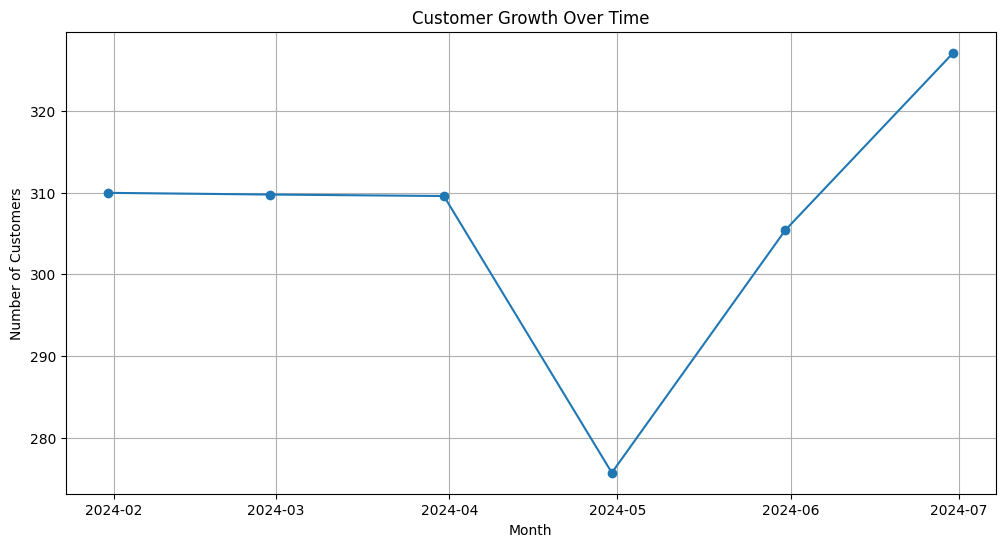

In [93]:
# Plot customa growt
plt.figure(figsize=(12,6))
plt.plot(monthly_customers.index, monthly_customers.values, marker='o', linestyle='-')
plt.title('Customer Growth Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()


### customer growth rate

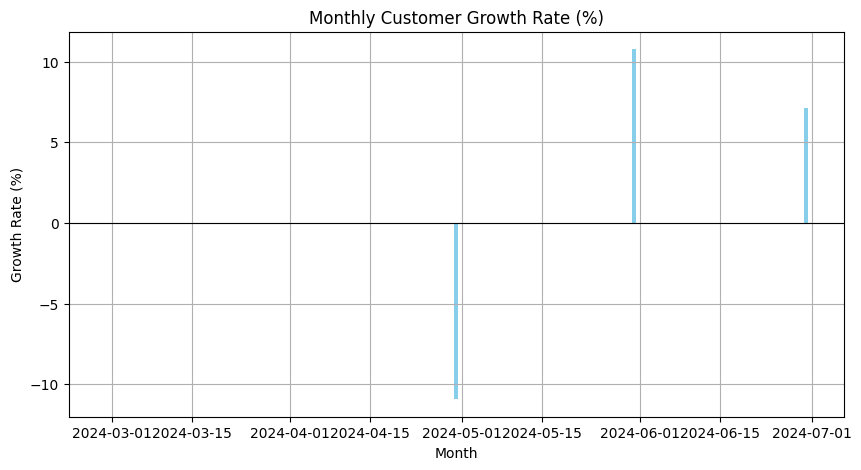

In [94]:
# Monthly growth rate (%)
growth_rate = monthly_customers.pct_change() * 100

# Plot growth rate
plt.figure(figsize=(10,5))
plt.bar(growth_rate.index, growth_rate.values, color='skyblue')
plt.title('Monthly Customer Growth Rate (%)')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.grid()
plt.axhline(0, color='black', linewidth=0.8)
plt.show()


Positive bars = growing customer base

Negative bars = shrinking customer base

# BUSINESS ANALYSIS DASHBOARD

C:\Users\HP\AppData\Local\Temp\ipykernel_17768\2641252649.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='Date').agg({
C:\Users\HP\AppData\Local\Temp\ipykernel_17768\2641252649.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


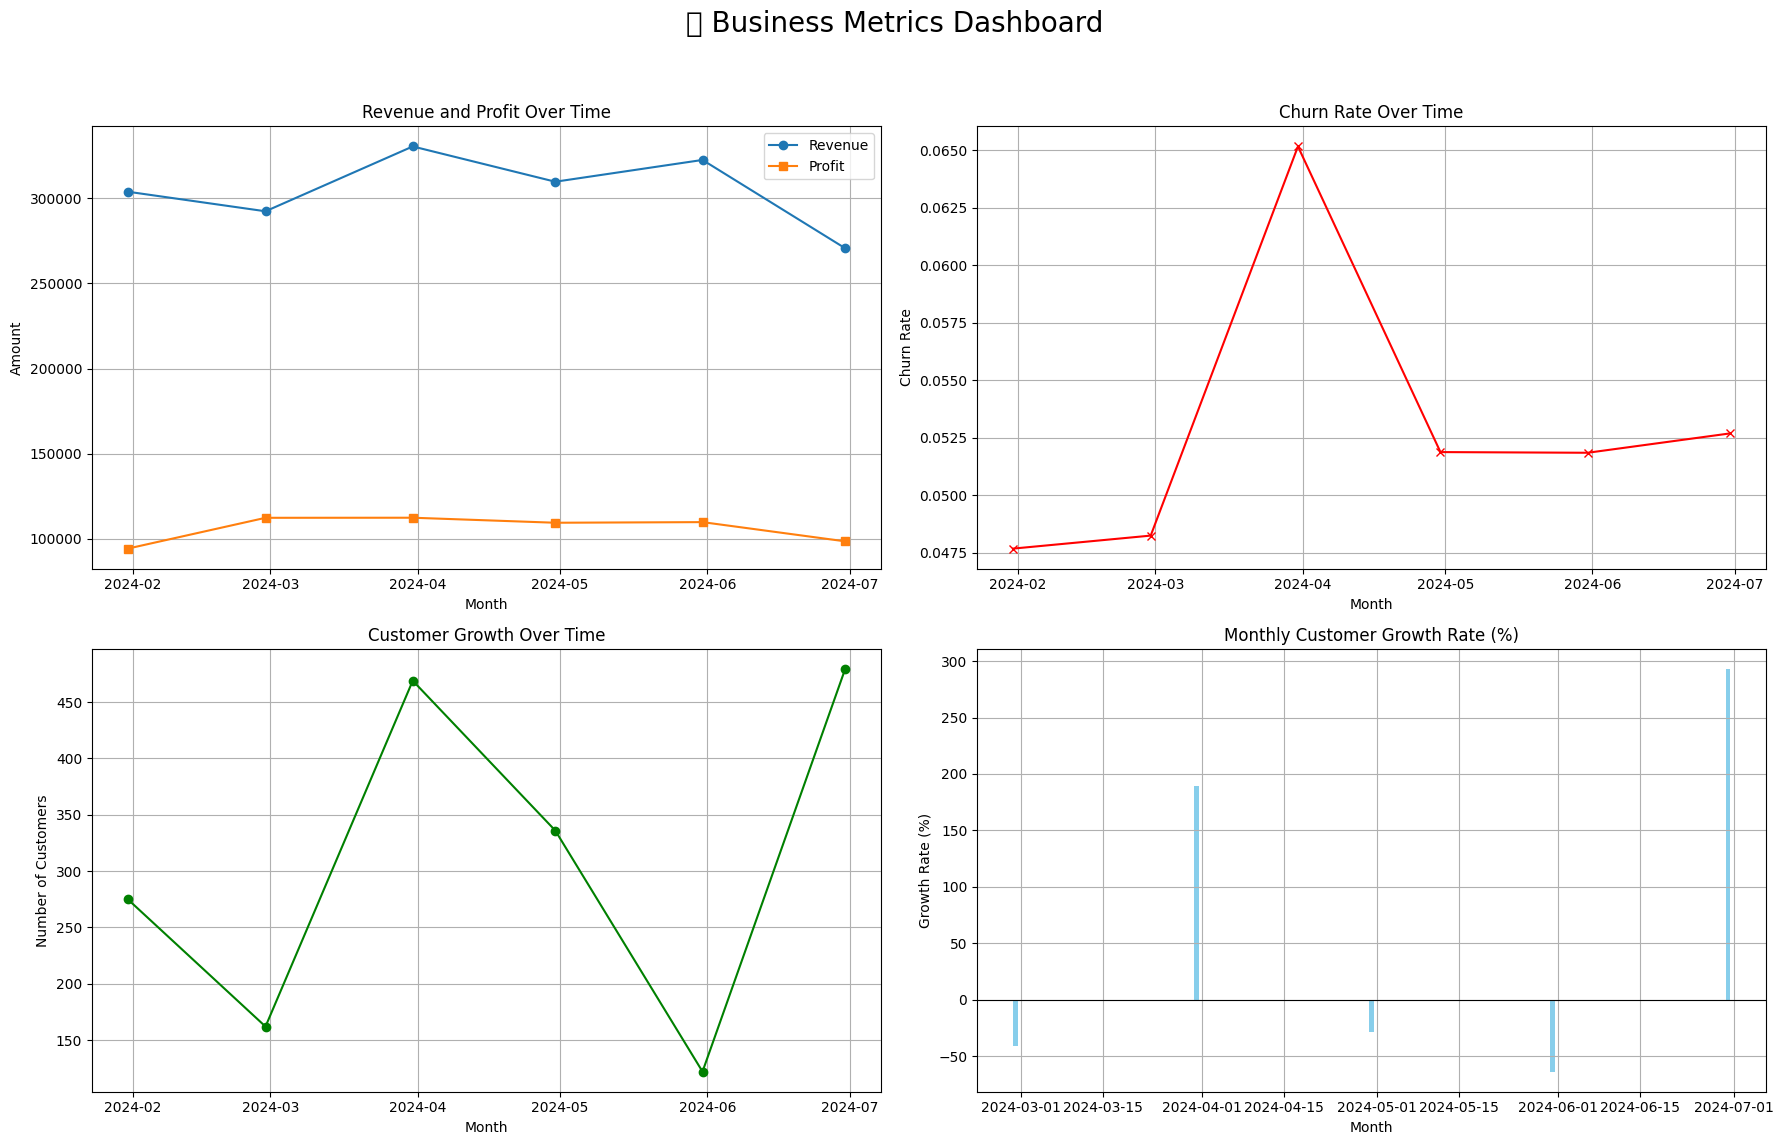

In [95]:
# Monthly aggregation
monthly = df.resample('M', on='Date').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Churn Rate': 'mean',
    'Customers': 'last'
})

# Monthly growth rate for customers
monthly['Customer Growth Rate (%)'] = monthly['Customers'].pct_change() * 100

# 2x2 dashboard
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle(' Business Metrics Dashboard', fontsize=20)

# 1. Revenue and Profit Trend
axs[0, 0].plot(monthly.index, monthly['Revenue'], label='Revenue', marker='o')
axs[0, 0].plot(monthly.index, monthly['Profit'], label='Profit', marker='s')
axs[0, 0].set_title('Revenue and Profit Over Time')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Amount')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Churn Rate Trend
axs[0, 1].plot(monthly.index, monthly['Churn Rate'], color='red', marker='x')
axs[0, 1].set_title('Churn Rate Over Time')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Churn Rate')
axs[0, 1].grid(True)

# 3. Customer Growth (Number of Customers)
axs[1, 0].plot(monthly.index, monthly['Customers'], color='green', marker='o')
axs[1, 0].set_title('Customer Growth Over Time')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Customers')
axs[1, 0].grid(True)

# 4. Customer Growth Rate (%)
axs[1, 1].bar(monthly.index, monthly['Customer Growth Rate (%)'], color='skyblue')
axs[1, 1].set_title('Monthly Customer Growth Rate (%)')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Growth Rate (%)')
axs[1, 1].axhline(0, color='black', linewidth=0.8)
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
